# <font color = "red"> Loading  the Data and reading it using pandas</font>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df1 = pd.read_csv("autos.csv",encoding='latin-1')
df2 = pd.read_csv("cnt_km_year_powerPS_minPrice_maxPrice_avgPrice_sdPrice.csv")

In [3]:
print(df1.shape)
df1.head()

(371528, 20)


,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [4]:
df1.shape

(371528, 20)

In [5]:
df1.dtypes

dateCrawled            object
name                   object
seller                 object
offerType              object
price                   int64
abtest                 object
vehicleType            object
yearOfRegistration      int64
gearbox                object
powerPS                 int64
model                  object
kilometer               int64
monthOfRegistration     int64
fuelType               object
brand                  object
notRepairedDamage      object
dateCreated            object
nrOfPictures            int64
postalCode              int64
lastSeen               object
dtype: object

In [6]:
df1["abtest"].value_counts()

test       192585
control    178943
Name: abtest, dtype: int64

In [7]:
df1["fuelType"].value_counts()

benzin     223857
diesel     107746
lpg          5378
cng           571
hybrid        278
andere        208
elektro       104
Name: fuelType, dtype: int64

In [8]:
df1.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,nrOfPictures,postalCode
count,3.715280e+05,371528.000000,371528.000000,371528.000000,371528.000000,371528.0,371528.00000
mean,1.729514e+04,2004.577997,115.549477,125618.688228,5.734445,0.0,50820.66764
std,3.587954e+06,92.866598,192.139578,40112.337051,3.712412,0.0,25799.08247
min,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.00000
25%,1.150000e+03,1999.000000,70.000000,125000.000000,3.000000,0.0,30459.00000
50%,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000,0.0,49610.00000
75%,7.200000e+03,2008.000000,150.000000,150000.000000,9.000000,0.0,71546.00000
max,2.147484e+09,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.00000


# <font color = "red"> Checking the missing values in the dataset</font>

In [9]:
df1.isnull().sum()

dateCrawled                0
name                       0
seller                     0
offerType                  0
price                      0
abtest                     0
vehicleType            37869
yearOfRegistration         0
gearbox                20209
powerPS                    0
model                  20484
kilometer                  0
monthOfRegistration        0
fuelType               33386
brand                      0
notRepairedDamage      72060
dateCreated                0
nrOfPictures               0
postalCode                 0
lastSeen                   0
dtype: int64

In [10]:
x = df1.isnull().mean()*100
x[x>0]

vehicleType          10.192771
gearbox               5.439429
model                 5.513447
fuelType              8.986133
notRepairedDamage    19.395577
dtype: float64

In [11]:
df1.gearbox.value_counts()

manuell      274214
automatik     77105
Name: gearbox, dtype: int64

In [12]:
df1.groupby(["brand"])["gearbox"].value_counts()

brand           gearbox  
alfa_romeo      manuell       2064
                automatik      146
audi            manuell      20841
                automatik    10698
bmw             manuell      25323
                automatik    13442
chevrolet       manuell       1104
                automatik      634
chrysler        automatik      753
                manuell        637
citroen         manuell       4304
                automatik      604
dacia           manuell        877
                automatik        1
daewoo          manuell        475
                automatik       33
daihatsu        manuell        667
                automatik       85
fiat            manuell       8786
                automatik      231
ford            manuell      22198
                automatik     1953
honda           manuell       2393
                automatik      318
hyundai         manuell       3091
                automatik      421
jaguar          automatik      477
                manuell      

In [13]:
df1.vehicleType.value_counts()

limousine     95894
kleinwagen    80023
kombi         67564
bus           30201
cabrio        22898
coupe         19015
suv           14707
andere         3357
Name: vehicleType, dtype: int64

In [14]:
df1.groupby(["fuelType"])["vehicleType"].value_counts()

fuelType  vehicleType
andere    limousine         51
          andere            44
          kleinwagen        29
          kombi             25
          bus               10
          suv                9
          cabrio             6
          coupe              3
benzin    kleinwagen     67739
          limousine      62245
          kombi          28012
          cabrio         19822
          coupe          15030
          bus             9742
          suv             4957
          andere          1428
cng       bus              240
          kombi            136
          kleinwagen        80
          limousine         40
          andere            14
          suv                4
          cabrio             3
          coupe              3
diesel    kombi          34848
          limousine      27648
          bus            18622
          suv             8665
          kleinwagen      6808
          coupe           2737
          cabrio          1871
          andere 

In [15]:
gearbox = df1["gearbox"].unique()
gearbox

array(['manuell', 'automatik', nan], dtype=object)

In [16]:
df1[(df1.gearbox == "manuell") & (df1.brand == "audi")].shape[0]

20841

In [17]:
gearbox = df1["gearbox"].unique()
brand = df1["brand"].unique()
for i in brand :
    m = 0
    x={}
    for j in gearbox :
        x =df1[(df1.gearbox == j) & (df1.brand == i)].shape[0]
x

0

In [18]:
gearbox = df1["gearbox"].unique()
brand = df1["brand"].unique()
d = {}

for i in brand :
    m = 0
    for j in gearbox :
        if df1[(df1.gearbox == j) & (df1.brand == i)].shape[0] > m :
            m = df1[(df1.gearbox == j) & (df1.brand == i)].shape[0]
            d[i] = j

In [19]:
for i in brand :
    df1.loc[(df1.brand == i) & (df1.gearbox.isnull()) ,"gearbox" ] = d[i]

In [20]:
df1["gearbox"].isnull().sum()

0

In [21]:
df1["notRepairedDamage"].value_counts()

nein    263182
ja       36286
Name: notRepairedDamage, dtype: int64

In [22]:
df1["notRepairedDamage"].fillna(df1["notRepairedDamage"].value_counts().index[0],inplace =True)

In [23]:
df1["model"].fillna(df1["model"].value_counts().index[0],inplace =True)

In [24]:
df1["notRepairedDamage"].isnull().sum()

0

In [25]:
df1["fuelType"].fillna(df1["fuelType"].value_counts().index[0],inplace =True)

In [26]:
df1["fuelType"].value_counts().index[0]

'benzin'

In [27]:
x = df1.isnull().mean()*100
x[x>0]

vehicleType    10.192771
dtype: float64

In [28]:
x = df1.groupby("fuelType")["vehicleType"].value_counts()
x

fuelType  vehicleType
andere    limousine         51
          andere            44
          kleinwagen        29
          kombi             25
          bus               10
          suv                9
          cabrio             6
          coupe              3
benzin    kleinwagen     72531
          limousine      66300
          kombi          31350
          cabrio         20769
          coupe          15935
          bus            10795
          suv             5400
          andere          1786
cng       bus              240
          kombi            136
          kleinwagen        80
          limousine         40
          andere            14
          suv                4
          cabrio             3
          coupe              3
diesel    kombi          34848
          limousine      27648
          bus            18622
          suv             8665
          kleinwagen      6808
          coupe           2737
          cabrio          1871
          andere 

In [29]:
vehicleType = df1["vehicleType"].unique()
fuelType = df1["fuelType"].unique()
print(fuelType)
print(vehicleType)
vehicleType = np.delete(vehicleType,0)

['benzin' 'diesel' 'lpg' 'andere' 'hybrid' 'cng' 'elektro']
[nan 'coupe' 'suv' 'kleinwagen' 'limousine' 'cabrio' 'bus' 'kombi'
 'andere']


In [30]:
d = {}
for i in fuelType :
    m = 0
    for j in vehicleType :
        if df1[(df1.vehicleType == j) & (df1.fuelType == i)].shape[0] > m :
            m = df1[(df1.vehicleType == j) & (df1.fuelType == i)].shape[0]
            d[i] = j

In [31]:
'''
Code Understanding
d = {}
for i in fuelType :
    m = 0
    for j in vehicleType :
        print(i,j)
        if df1[(df1.vehicleType == j) & (df1.fuelType == i)].shape[0] > m :
            m = df1[(df1.vehicleType == j) & (df1.fuelType == i)].shape[0]
            print(m)
            d[i] = j
            print("="*10)
            print(d[i])
            print("="*10)
'''

'\nCode Understanding\nd = {}\nfor i in fuelType :\n    m = 0\n    for j in vehicleType :\n        print(i,j)\n        if df1[(df1.vehicleType == j) & (df1.fuelType == i)].shape[0] > m :\n            m = df1[(df1.vehicleType == j) & (df1.fuelType == i)].shape[0]\n            print(m)\n            d[i] = j\n            print("="*10)\n            print(d[i])\n            print("="*10)\n'

In [32]:
for i in fuelType :
    df1.loc[(df1.fuelType == i) & (df1.vehicleType.isnull()) ,"vehicleType" ] = d[i]

In [33]:
df1.isnull().sum().sum()

0

In [34]:
df1.columns

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'kilometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')

In [35]:
df2.head()

,count,km,year,powerPS,minPrice,maxPrice,avgPrice,sdPrice
0,19,125000,1991,40,300,1499,648.3158,352.035293
1,69,150000,1991,40,110,1600,516.4348,346.767661
2,11,90000,1991,60,330,10000,2342.4545,3017.432333
3,26,100000,1991,60,200,8750,1392.3846,1598.662833
4,42,125000,1991,60,150,4600,1140.6429,1010.314138


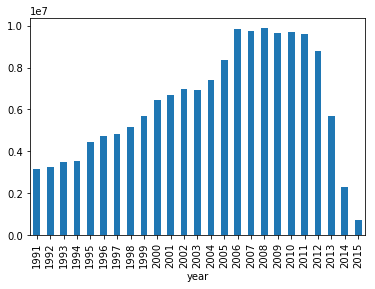

In [36]:
df2.groupby("year")["km"].sum().plot(kind = "bar")

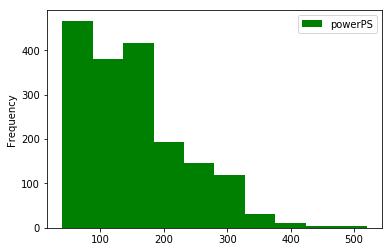

In [37]:
df2.plot(y='powerPS', kind='hist', color='green')

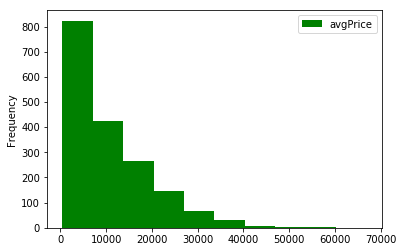

In [38]:
df2.plot(y='avgPrice', kind='hist', color='green')

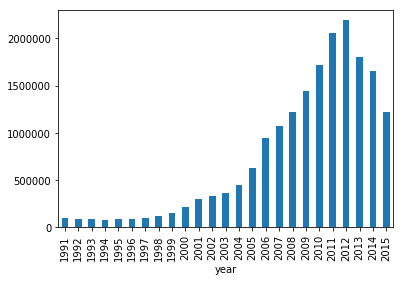

In [39]:
df2.groupby("year")["avgPrice"].sum().plot(kind = "bar")

In [40]:
df2.groupby("year").sum()

,count,km,powerPS,minPrice,maxPrice,avgPrice,sdPrice
year,,,,,,,
1991,2035,3145000,3020,12326,412128,1.007159e+05,87881.969635
1992,2251,3260000,3160,11229,402548,8.324550e+04,80253.794698
1993,2573,3500000,3660,12970,300706,8.439649e+04,65132.072549
1994,3769,3535000,3600,11960,397616,8.254372e+04,82659.599526
1995,6778,4440000,4800,14242,447939,8.910005e+04,81049.612390
1996,8759,4750000,5280,17233,519409,9.291599e+04,87416.164260
1997,11898,4810000,5420,13124,575231,9.418975e+04,84841.694568
1998,14691,5165000,6060,18705,534631,1.221160e+05,91683.835273
1999,19109,5680000,7420,31125,601686,1.529588e+05,92854.388026


In [41]:
df1.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,kleinwagen,1993,manuell,0,golf,150000,0,benzin,volkswagen,nein,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,golf,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,nein,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [42]:
df1.isnull().sum().sum()

0

In [43]:
df1.drop(["dateCrawled","dateCreated","lastSeen"],axis = 1,inplace = True)

In [44]:
df1.name.nunique()

233531

In [45]:
del df1["name"]

In [46]:
df1.head()

,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,nrOfPictures,postalCode
0,privat,Angebot,480,test,kleinwagen,1993,manuell,0,golf,150000,0,benzin,volkswagen,nein,0,70435
1,privat,Angebot,18300,test,coupe,2011,manuell,190,golf,125000,5,diesel,audi,ja,0,66954
2,privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,nein,0,90480
3,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,0,91074
4,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,0,60437


In [47]:
ls = ["seller","vehicleType","fuelType","brand","notRepairedDamage","abtest","gearbox","offerType","model"]
for i in ls:
    print(i)
    print(df1[i].value_counts())
    print("="*10)

seller
privat        371525
gewerblich         3
Name: seller, dtype: int64
vehicleType
kleinwagen    112404
limousine      96253
kombi          72642
bus            30252
cabrio         22898
coupe          19015
suv            14707
andere          3357
Name: vehicleType, dtype: int64
fuelType
benzin     257243
diesel     107746
lpg          5378
cng           571
hybrid        278
andere        208
elektro       104
Name: fuelType, dtype: int64
brand
volkswagen        79640
bmw               40274
opel              40136
mercedes_benz     35309
audi              32873
ford              25573
renault           17969
peugeot           11027
fiat               9676
seat               7022
mazda              5695
skoda              5641
smart              5249
citroen            5182
nissan             5037
toyota             4694
sonstige_autos     3982
hyundai            3646
mini               3394
volvo              3327
mitsubishi         3061
honda              2836
kia           

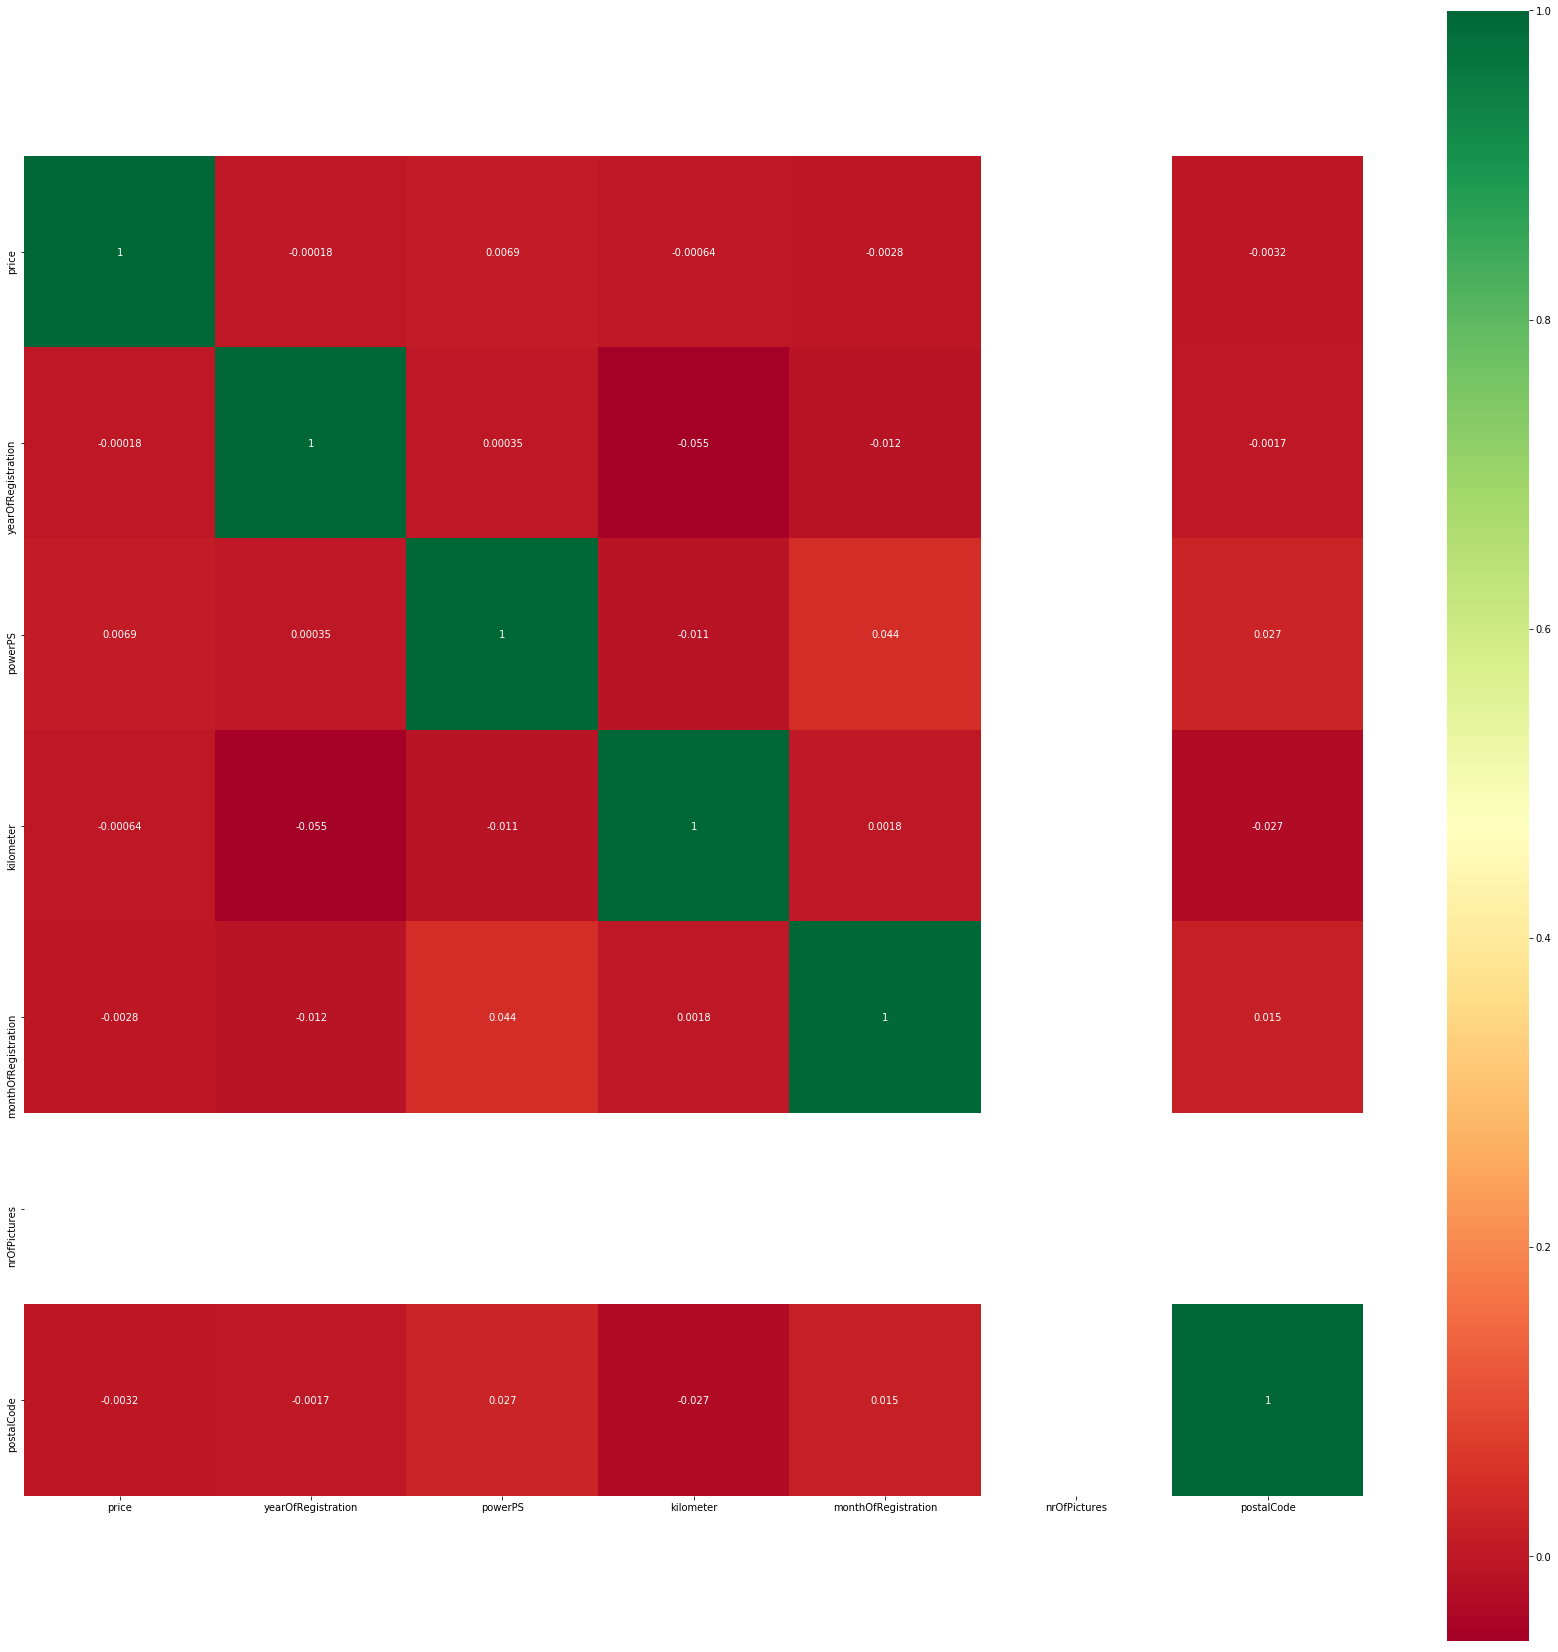

In [48]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,30)) 
sns.heatmap(df1.corr(),annot=True,cmap='RdYlGn',square=True)


In [49]:
from sklearn.preprocessing import LabelEncoder
model = LabelEncoder()
label = ["seller","notRepairedDamage","abtest","gearbox","model"]
for i in label:
    df1[i] = model.fit_transform(df1[i])
df1.head()

,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,nrOfPictures,postalCode
0,1,Angebot,480,1,kleinwagen,1993,1,0,118,150000,0,benzin,volkswagen,1,0,70435
1,1,Angebot,18300,1,coupe,2011,1,190,118,125000,5,diesel,audi,0,0,66954
2,1,Angebot,9800,1,suv,2004,0,163,119,125000,8,diesel,jeep,1,0,90480
3,1,Angebot,1500,1,kleinwagen,2001,1,75,118,150000,6,benzin,volkswagen,1,0,91074
4,1,Angebot,3600,1,kleinwagen,2008,1,69,103,90000,7,diesel,skoda,1,0,60437


In [50]:
replace_off = {"offerType":{"Angebot":1,"Gesuch":0}}
df1.replace(replace_off,inplace= True)
df1 = df1.astype({"offerType":int})

In [51]:
#sns.pairplot(df1)
#plt.show()

In [52]:
df1 = pd.get_dummies(df1)

In [53]:
df1.head()

,seller,offerType,price,abtest,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,...,brand_seat,brand_skoda,brand_smart,brand_sonstige_autos,brand_subaru,brand_suzuki,brand_toyota,brand_trabant,brand_volkswagen,brand_volvo
0,1,1,480,1,1993,1,0,118,150000,0,...,0,0,0,0,0,0,0,0,1,0
1,1,1,18300,1,2011,1,190,118,125000,5,...,0,0,0,0,0,0,0,0,0,0
2,1,1,9800,1,2004,0,163,119,125000,8,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1500,1,2001,1,75,118,150000,6,...,0,0,0,0,0,0,0,0,1,0
4,1,1,3600,1,2008,1,69,103,90000,7,...,0,1,0,0,0,0,0,0,0,0


In [54]:
df1.dtypes

seller                    int32
offerType                 int32
price                     int64
abtest                    int32
yearOfRegistration        int64
gearbox                   int32
powerPS                   int64
model                     int32
kilometer                 int64
monthOfRegistration       int64
notRepairedDamage         int32
nrOfPictures              int64
postalCode                int64
vehicleType_andere        uint8
vehicleType_bus           uint8
vehicleType_cabrio        uint8
vehicleType_coupe         uint8
vehicleType_kleinwagen    uint8
vehicleType_kombi         uint8
vehicleType_limousine     uint8
vehicleType_suv           uint8
fuelType_andere           uint8
fuelType_benzin           uint8
fuelType_cng              uint8
fuelType_diesel           uint8
fuelType_elektro          uint8
fuelType_hybrid           uint8
fuelType_lpg              uint8
brand_alfa_romeo          uint8
brand_audi                uint8
                          ...  
brand_fo

In [55]:
del df1["postalCode"]

In [56]:
df1.head()

,seller,offerType,price,abtest,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,...,brand_seat,brand_skoda,brand_smart,brand_sonstige_autos,brand_subaru,brand_suzuki,brand_toyota,brand_trabant,brand_volkswagen,brand_volvo
0,1,1,480,1,1993,1,0,118,150000,0,...,0,0,0,0,0,0,0,0,1,0
1,1,1,18300,1,2011,1,190,118,125000,5,...,0,0,0,0,0,0,0,0,0,0
2,1,1,9800,1,2004,0,163,119,125000,8,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1500,1,2001,1,75,118,150000,6,...,0,0,0,0,0,0,0,0,1,0
4,1,1,3600,1,2008,1,69,103,90000,7,...,0,1,0,0,0,0,0,0,0,0


In [57]:
df1["yearOfRegistration"].describe()

count    371528.000000
mean       2004.577997
std          92.866598
min        1000.000000
25%        1999.000000
50%        2003.000000
75%        2008.000000
max        9999.000000
Name: yearOfRegistration, dtype: float64

In [58]:
df1[df1["yearOfRegistration"]>2019].shape

(114, 67)

In [59]:
df1[df1.yearOfRegistration < 1940].shape

(254, 67)

In [60]:
df1 = df1[(df1["yearOfRegistration"]<2019) & (df1["yearOfRegistration"]>1940)]

In [61]:
df1["yearOfRegistration"].describe()

count    371131.000000
mean       2003.389480
std           7.544611
min        1941.000000
25%        1999.000000
50%        2003.000000
75%        2008.000000
max        2018.000000
Name: yearOfRegistration, dtype: float64

In [62]:
df1["price"].describe()

count    3.711310e+05
mean     1.724569e+04
std      3.589797e+06
min      0.000000e+00
25%      1.150000e+03
50%      2.950000e+03
75%      7.200000e+03
max      2.147484e+09
Name: price, dtype: float64

In [63]:
df1[df1.price < 100].shape

(13178, 67)

In [64]:
df1[df1.price > 300000].shape

(118, 67)

In [65]:
df1 = df1[(df1.price < 300000) & (df1.price > 100)]

In [66]:
df1.price.describe()

count    356807.000000
mean       5944.831618
std        8714.683854
min         101.000000
25%        1299.000000
50%        3100.000000
75%        7500.000000
max      299000.000000
Name: price, dtype: float64

(array([3.50821e+05, 5.00400e+03, 6.23000e+02, 1.62000e+02, 8.60000e+01,
        4.30000e+01, 2.60000e+01, 1.90000e+01, 1.40000e+01, 9.00000e+00]),
 array([1.010000e+02, 2.999090e+04, 5.988080e+04, 8.977070e+04,
        1.196606e+05, 1.495505e+05, 1.794404e+05, 2.093303e+05,
        2.392202e+05, 2.691101e+05, 2.990000e+05]),
 <a list of 10 Patch objects>)

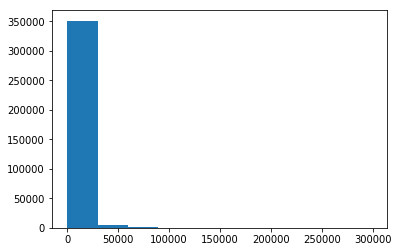

In [67]:
plt.hist(df1["price"])

(array([ 5339., 16322., 56229., 73100., 84118., 74531., 39062.,  7188.,
          779.,   139.]),
 array([ 4.61512052,  5.41442835,  6.21373618,  7.01304402,  7.81235185,
         8.61165968,  9.41096752, 10.21027535, 11.00958319, 11.80889102,
        12.60819885]),
 <a list of 10 Patch objects>)

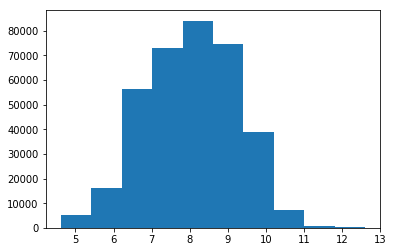

In [68]:
plt.hist(np.log(df1["price"]))

In [69]:
Y = np.log(df1["price"])
X = df1.drop("price",axis = 1)

In [70]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()  
numerical = ['yearOfRegistration', 'powerPS', 'kilometer',"model"]
X[numerical] = scaler.fit_transform(X[numerical])

In [71]:
X.head()

,seller,offerType,abtest,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,notRepairedDamage,...,brand_seat,brand_skoda,brand_smart,brand_sonstige_autos,brand_subaru,brand_suzuki,brand_toyota,brand_trabant,brand_volkswagen,brand_volvo
0,1,1,1,0.675325,1,0.00000,0.472,1.000000,0,1,...,0,0,0,0,0,0,0,0,1,0
1,1,1,1,0.909091,1,0.00950,0.472,0.827586,5,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0.818182,0,0.00815,0.476,0.827586,8,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0.779221,1,0.00375,0.472,1.000000,6,1,...,0,0,0,0,0,0,0,0,1,0
4,1,1,1,0.870130,1,0.00345,0.412,0.586207,7,1,...,0,1,0,0,0,0,0,0,0,0


In [91]:
from sklearn.model_selection import train_test_split

In [92]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2, random_state=123)

In [93]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(x_train, y_train)
rfr.score(x_test, y_test)

0.8438584702729081

In [100]:
predict = rfr.predict(x_test)
print(predict)

[ 6.01536708  8.96761129 10.09535525 ...  7.9668907   6.36063536
  6.91331619]


In [95]:
test = pd.DataFrame()
test["current"] = np.exp(y_test)
test["Predicted"] = np.exp(predict)
test

,current,Predicted
35920,400.0,409.676195
51321,6490.0,7844.840156
160115,19900.0,24230.204364
301181,6250.0,5397.640755
143611,8900.0,9185.339748
230730,2200.0,2357.749195
362488,8500.0,6475.319106
193789,2350.0,2815.856231
135988,4400.0,4411.017335
1261,1650.0,795.436532


In [77]:
#pip install xgboost

In [78]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [80]:
data_dmatrix = xgb.DMatrix(data=X,label=Y)

C:\Users\admin\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


In [81]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=123)

In [82]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [83]:
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

[20:07:08] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [87]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 2.742480


In [88]:
test = pd.DataFrame()
test["current"] = np.exp(y_test)
test["Predicted"] = np.exp(preds)
test

,current,Predicted
35920,400.0,135.500092
51321,6490.0,308.936035
160115,19900.0,554.278381
301181,6250.0,259.322418
143611,8900.0,348.332855
230730,2200.0,198.601974
362488,8500.0,367.136108
193789,2350.0,198.845032
135988,4400.0,253.777771
1261,1650.0,151.229187


In [90]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, preds)

ValueError: continuous is not supported

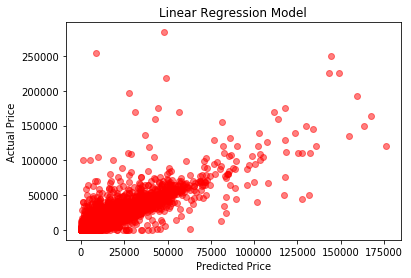

In [99]:
actual_values = test["current"]
plt.scatter(test["Predicted"], actual_values, alpha=.5,
            color='r') #alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')
plt.show()